<p>Pandas - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.</p>

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<h2>Series</h2>

<p>Series - одномерный индексированный массив данных</p>

In [2]:
# Создание объекта Series из 4х элементов, индексированных буквами
salaries = pd.Series([400, 300, 200, 250], 
              index = ['Andrew', 'Bob', 
                       'Charles', 'Ann']) 
print(salaries)

Andrew     400
Bob        300
Charles    200
Ann        250
dtype: int64


In [3]:
salaries[salaries > 250]

Andrew    400
Bob       300
dtype: int64

In [4]:
print(salaries.Andrew == salaries['Andrew'])

True


In [5]:
salaries.Andrew

400

In [17]:
salaries['Carl'] = np.nan

In [18]:
salaries['Carl']

nan

In [19]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl         NaN
dtype: float64

In [20]:
# fillna - заполняет значения nan, используя указанный метод
# inplace=False - меняет только для выводимого значения
# inplace=True - меняет для всего фрейма
salaries.fillna(salaries.median(), inplace=True)

In [21]:
salaries

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64

In [24]:
# Series поддерживает пропуски в данных - ?
salaries.c = np.nan # Series can contain missing values
print(salaries)

Andrew     400.0
Bob        300.0
Charles    200.0
Ann        250.0
Carl       275.0
dtype: float64


In [26]:
print('Second element of salaries is', salaries[1], '\n')
# Smart indexing
print(salaries[:3], '\n')
print('There are', len(salaries[salaries > 0]), 'positive elements in salaries\n')
# Series obects can be the arguments for Numpy functions
print(np.exp(salaries))

Second element of salaries is 300.0 

Andrew     400.0
Bob        300.0
Charles    200.0
dtype: float64 

There are 5 positive elements in salaries

Andrew     5.221470e+173
Bob        1.942426e+130
Charles     7.225974e+86
Ann        3.746455e+108
Carl       2.697631e+119
dtype: float64


<h2>DataFrame</h2>

<p>DataFrame - это двухмерная структура данных. Такой объект можно создать из массива numpy, указав названия строк и столбцов.</p>

In [28]:
df1 = pd.DataFrame(np.random.randn(5, 3), 
                   index=['o1', 'o2', 'o3', 'o4', 'o5'], 
                   columns=['f1', 'f2', 'f3'])
df1

,f1,f2,f3
o1,-0.729280,-1.748602,-0.769661
o2,-0.309239,-1.161037,-0.361611
o3,-0.717120,0.210630,0.255386
o4,0.421596,0.114779,0.024012
o5,-0.243901,0.086311,-1.339281


In [29]:
# Альтернативный способ создания DataFrame
df2 = pd.DataFrame({'A': np.random.random(5), 
                    'B': ['a', 'b', 'c', 'd', 'e'], 
                    'C': np.arange(5) > 2})
df2

,A,B,C
0,0.426693,a,False
1,0.398375,b,False
2,0.861358,c,False
3,0.236925,d,True
4,0.448368,e,True


In [30]:
# Обращение к элементам
print('The element in position 3, B is', df2.at[3, 'B'], '\n')
print(df2.loc[[1, 4], ['A', 'B']])

The element in position 3, B is d 

          A  B
1  0.398375  b
4  0.448368  e


In [31]:
# Изменение элементов и добавление новых
df2.at[2, 'B'] = 'f'
df2

,A,B,C
0,0.426693,a,False
1,0.398375,b,False
2,0.861358,f,False
3,0.236925,d,True
4,0.448368,e,True


In [32]:
df2.loc[5] = [3.1415, 'c', False]
df2

,A,B,C
0,0.426693,a,False
1,0.398375,b,False
2,0.861358,f,False
3,0.236925,d,True
4,0.448368,e,True
5,3.141500,c,False


In [33]:
# Изменит названия колонок
df1.columns = ['A', 'B', 'C']
# Объединение
df3 = df1.append(df2)
df3

,A,B,C
o1,-0.729280,-1.7486,-0.769661
o2,-0.309239,-1.16104,-0.361611
o3,-0.717120,0.21063,0.255386
o4,0.421596,0.114779,0.024012
o5,-0.243901,0.0863106,-1.339281
0,0.426693,a,0.000000
1,0.398375,b,0.000000
2,0.861358,f,0.000000
3,0.236925,d,1.000000
4,0.448368,e,1.000000


<h3>Обработка пропущенных значений</h3>

In [34]:
df1.at['o2', 'A'] = np.nan
df1.at['o4', 'C'] = np.nan
df1

,A,B,C
o1,-0.729280,-1.748602,-0.769661
o2,NaN,-1.161037,-0.361611
o3,-0.717120,0.210630,0.255386
o4,0.421596,0.114779,NaN
o5,-0.243901,0.086311,-1.339281


In [35]:
# Булева маска для пропущенных значений (True - там, где был пропуск, иначе - False)
pd.isnull(df1)

,A,B,C
o1,False,False,False
o2,True,False,False
o3,False,False,False
o4,False,False,True
o5,False,False,False


In [36]:
# Можно удалить все строки, где есть хотя бы один пропуск
# dropna - удалить пустое значение
# how='any' - удалить строки, где есть значение NaN
df1.dropna(how='any')

,A,B,C
o1,-0.729280,-1.748602,-0.769661
o3,-0.717120,0.210630,0.255386
o5,-0.243901,0.086311,-1.339281


In [37]:
# Пропуски можно заменить каким-то значением
df1.fillna(0)

,A,B,C
o1,-0.729280,-1.748602,-0.769661
o2,0.000000,-1.161037,-0.361611
o3,-0.717120,0.210630,0.255386
o4,0.421596,0.114779,0.000000
o5,-0.243901,0.086311,-1.339281


<h2>Пример первичного анализа данных с Pandas</h2>

In [38]:
df = pd.read_csv('beauty.csv', sep = ';')

In [39]:
print(df.shape)
print(df.columns.values)

(1260, 10)
['wage' 'exper' 'union' 'goodhlth' 'black' 'female' 'married' 'service'
 'educ' 'looks']


In [40]:
df.head(10)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [41]:
# describe показывает основные статистические характеристики
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [44]:
# DataFrame можно отсортировать по значению какого-нибудь из признаков, например, по размеру заработной платы
df.sort_values(by='wage', ascending = False).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3


In [45]:
# Сначала мужчины с самой высокой зп
df.sort_values(by=['female', 'wage'],
        ascending=[True, False]).head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
269,41.67,16,0,0,0,0,1,0,13,4
415,38.86,29,0,1,0,0,1,0,13,3
69,32.79,33,0,1,0,0,1,1,16,4
290,31.09,32,0,0,0,0,1,0,13,3
68,29.98,12,0,1,0,0,1,1,17,3


<h2>Индексация и извлечение данных</h2>

In [46]:
# Какова доля людей с хорошим здоровьем среди опрошенных?
df['goodhlth'].mean()

0.9333333333333333

In [47]:
# Можно задать условие для столбцов.
# Итогом индексации является DataFrame, состоящий только из строк, удовлетворяющих условию по столбцу
df[df['female'] == 1].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
5,3.91,20,0,0,0,1,1,0,12,3
8,5.00,5,0,1,0,1,0,0,16,3


In [48]:
df[(df['goodhlth'] == 1) & 
   (df['female'] == 1)].head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [49]:
# На сколько средняя заработная плата мужчин выше средней заработной платы среди женщин?
df[(df['female'] == 0)]['wage'].mean() - \
df[(df['female'] == 1)]['wage'].mean()

3.069465017368837

In [51]:
# Какова максимальная заработная плата среди мужчин, имеющих членство в профсоюзе, и с опытом работы до 10 лет?
df[(df['female'] == 0) & (df['union'] == 1) & (df['exper'] < 10)]['wage'].max()

12.82

In [52]:
# Применение функции к каждому столбцу
df.apply(np.mean)

wage         6.306690
exper       18.206349
union        0.272222
goodhlth     0.933333
black        0.073810
female       0.346032
married      0.691270
service      0.273810
educ        12.563492
looks        3.185714
dtype: float64

In [53]:
# Группирование данных
df['looks'].describe()

count    1260.000000
mean        3.185714
std         0.684877
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: looks, dtype: float64

In [58]:
# Группирование данных в зависимости от значения признака looks
# groupby - разделение данных по признаку
# i - индекс строк, sub_df - данные
g = df.groupby('looks') 
for (i, sub_df) in g:
    print(i, sub_df)

1        wage  exper  union  goodhlth  black  female  married  service  educ  \
28     8.35     41      0         0      0       0        1        1    16   
200    3.75     36      0         1      0       0        0        0    12   
248   10.99     40      0         1      0       0        1        0    12   
327    1.65     24      0         1      0       1        0        1    13   
751    7.93     39      1         1      0       0        1        0    12   
837    5.56     10      0         1      0       0        1        0    13   
842    7.69      9      1         0      0       0        1        0    12   
877    2.73     41      0         1      0       0        1        0     8   
980    2.31     35      1         1      0       0        1        0     5   
1126   3.46     26      0         1      0       1        0        1     5   
1149   1.26     32      0         1      1       1        0        0     5   
1171   2.25     12      0         1      1       1        0   

In [59]:
# выводим для каждой оценки 1-5 средний доход
g = df.groupby('looks') 
for (i, sub_df) in g:
    print(sub_df['wage'].mean(), sub_df['looks'].mean())

4.621538461538462 1.0
5.328802816901409 2.0
6.504598337950134 3.0
6.299340659340659 4.0
7.38842105263158 5.0


In [60]:
# Обращение к конкретной группе
d1 = g.get_group(1)
d1

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
28,8.35,41,0,0,0,0,1,1,16,1
200,3.75,36,0,1,0,0,0,0,12,1
248,10.99,40,0,1,0,0,1,0,12,1
327,1.65,24,0,1,0,1,0,1,13,1
751,7.93,39,1,1,0,0,1,0,12,1
837,5.56,10,0,1,0,0,1,0,13,1
842,7.69,9,1,0,0,0,1,0,12,1
877,2.73,41,0,1,0,0,1,0,8,1
980,2.31,35,1,1,0,0,1,0,5,1
1126,3.46,26,0,1,0,1,0,1,5,1


<h2>Визуализация в Pandas</h2>

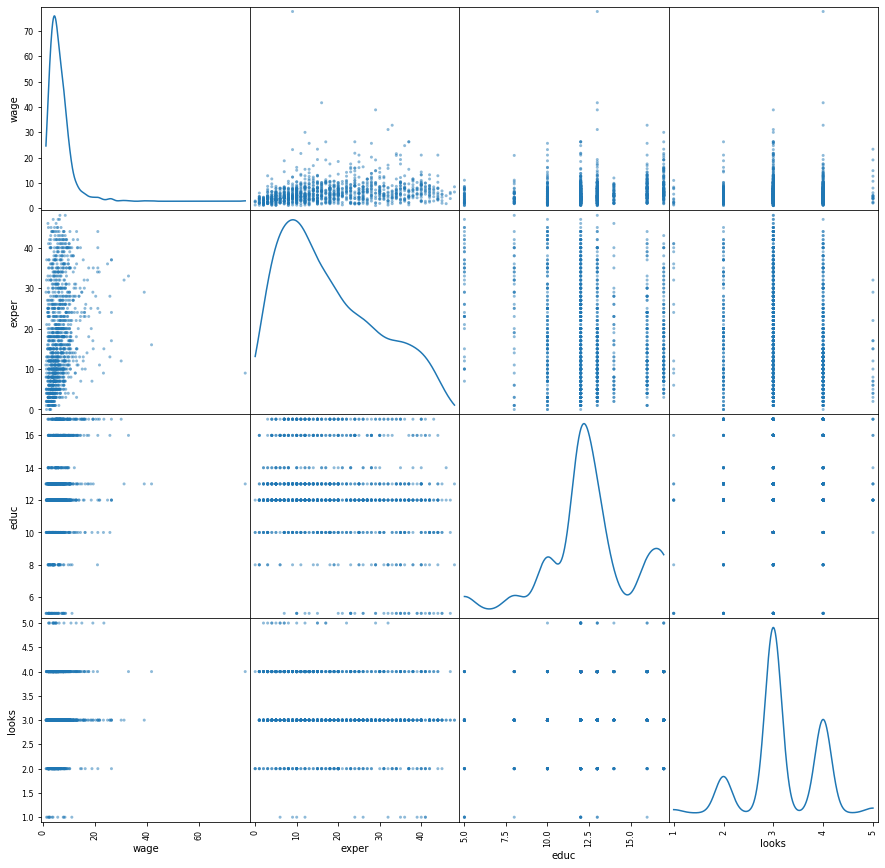

In [61]:
# визуализировать попарные зависимости между признаками
pd.plotting.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

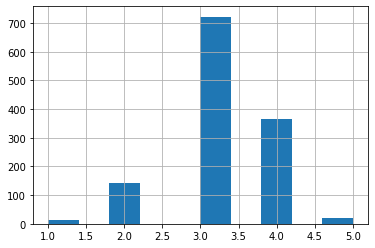

In [62]:
# Для каждого признака можно построить отдельную гистограмму
df['looks'].hist()

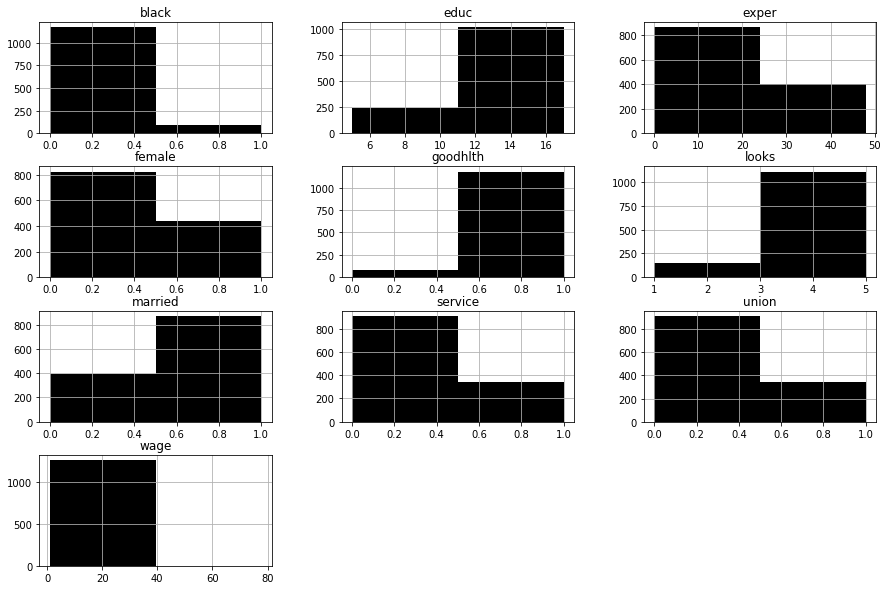

In [66]:
# Построить гистограмму для всех признаков
# bins - количество точек на графике (чем больше, тем точнее отображается разница)
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

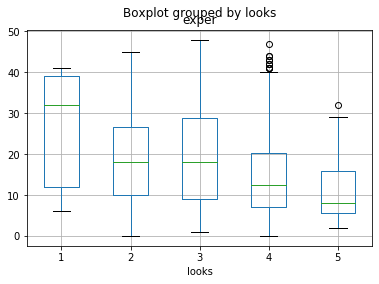

In [67]:
# boxplot - ящик с усами, визуализирует основные характеристики
df.boxplot(column='exper', by='looks')
plt.show()

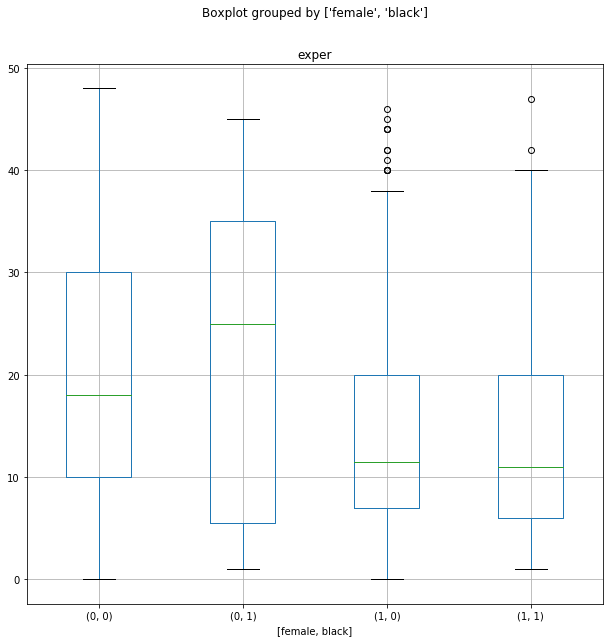

In [68]:
# Можно сгруппировать данные
df.boxplot(column='exper',  by=['female', 'black'], 
           figsize=(10,10))
plt.show()